In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
#import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import colormaps as cmaps
from readCMIP5 import *

%pylab inline

matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

Populating the interactive namespace from numpy and matplotlib


<div class="alert alert-warning">
<h3>Let's read in our data files for surface air temperature (TAS). We focus on using a consistent ensemble (#1) from CCSM4, but for varying representative concentration pathway (RCP) scenarios. These scenarios allow us to evaluate the different forcings from anthropogenic climate change.</h3>
</div>

In [18]:
snow_depth = readCMIP5Data("../data/SnowDepth_snd/", "gridded", "rcp45", "1", "snd")[2]

In [3]:
surface_temp = readCMIP5Data("../data/SeaSurfaceTemperature_tos/",'gridded','rcp45','1','tos')[2]

In [4]:
snow_depth_means = np.asarray(snow_depth.mean(axis=3).mean(axis=2))
snow_depth_means = snow_depth_means.reshape([95*12])

In [5]:
surface_temp_means = np.asarray(surface_temp.mean(axis=3).mean(axis=2))
surface_temp_means = surface_temp_means.reshape([95*12])

In [6]:
both_means = np.transpose(np.vstack((snow_depth_means, surface_temp_means)))

In [7]:
both_means_df = pd.DataFrame(both_means, columns=["snd", "tos"])

In [8]:
month_idx = pd.date_range('2005-01-01', periods=95*12, freq='1M')
both_means_df = both_means_df.set_index(month_idx)

/usr/lib/python2.7/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


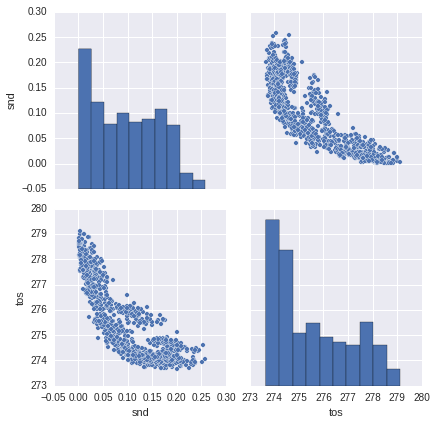

In [9]:
sns.pairplot(both_means_df)

In [10]:
both_means_df.corr()

,snd,tos
snd,1.000000,-0.848155
tos,-0.848155,1.000000


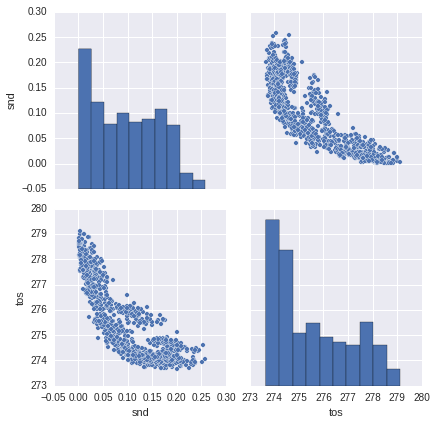

In [11]:
sns.pairplot(both_means_df)

In [12]:
both_means_df.index.month

array([ 1,  2,  3, ..., 10, 11, 12], dtype=int32)

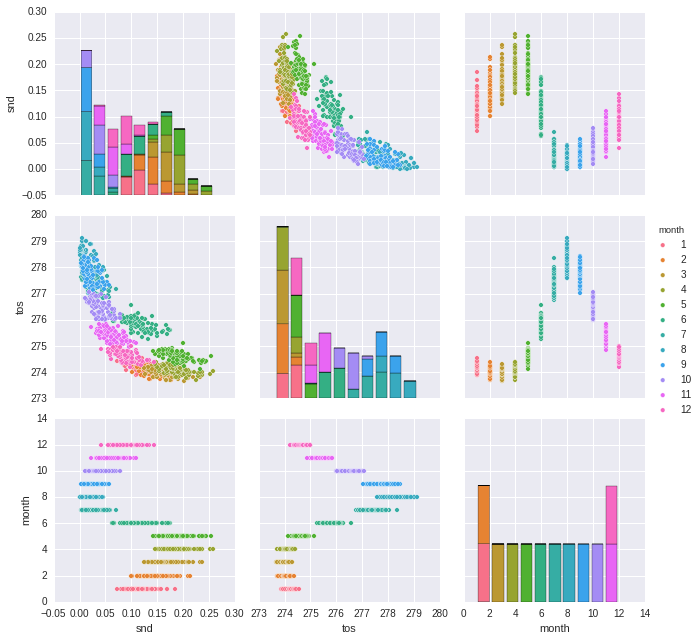

In [13]:
both_means_df["month"] = both_means_df.index.month
sns.pairplot(both_means_df, hue="month")

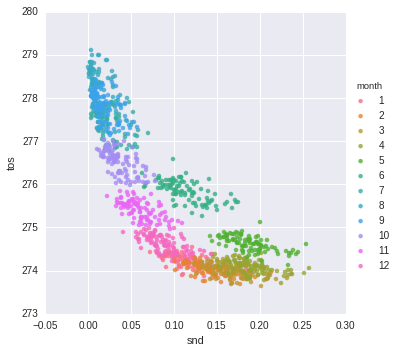

In [14]:
sns.lmplot(x="snd", y="tos", data=both_means_df, size=5, hue="month", fit_reg=False)

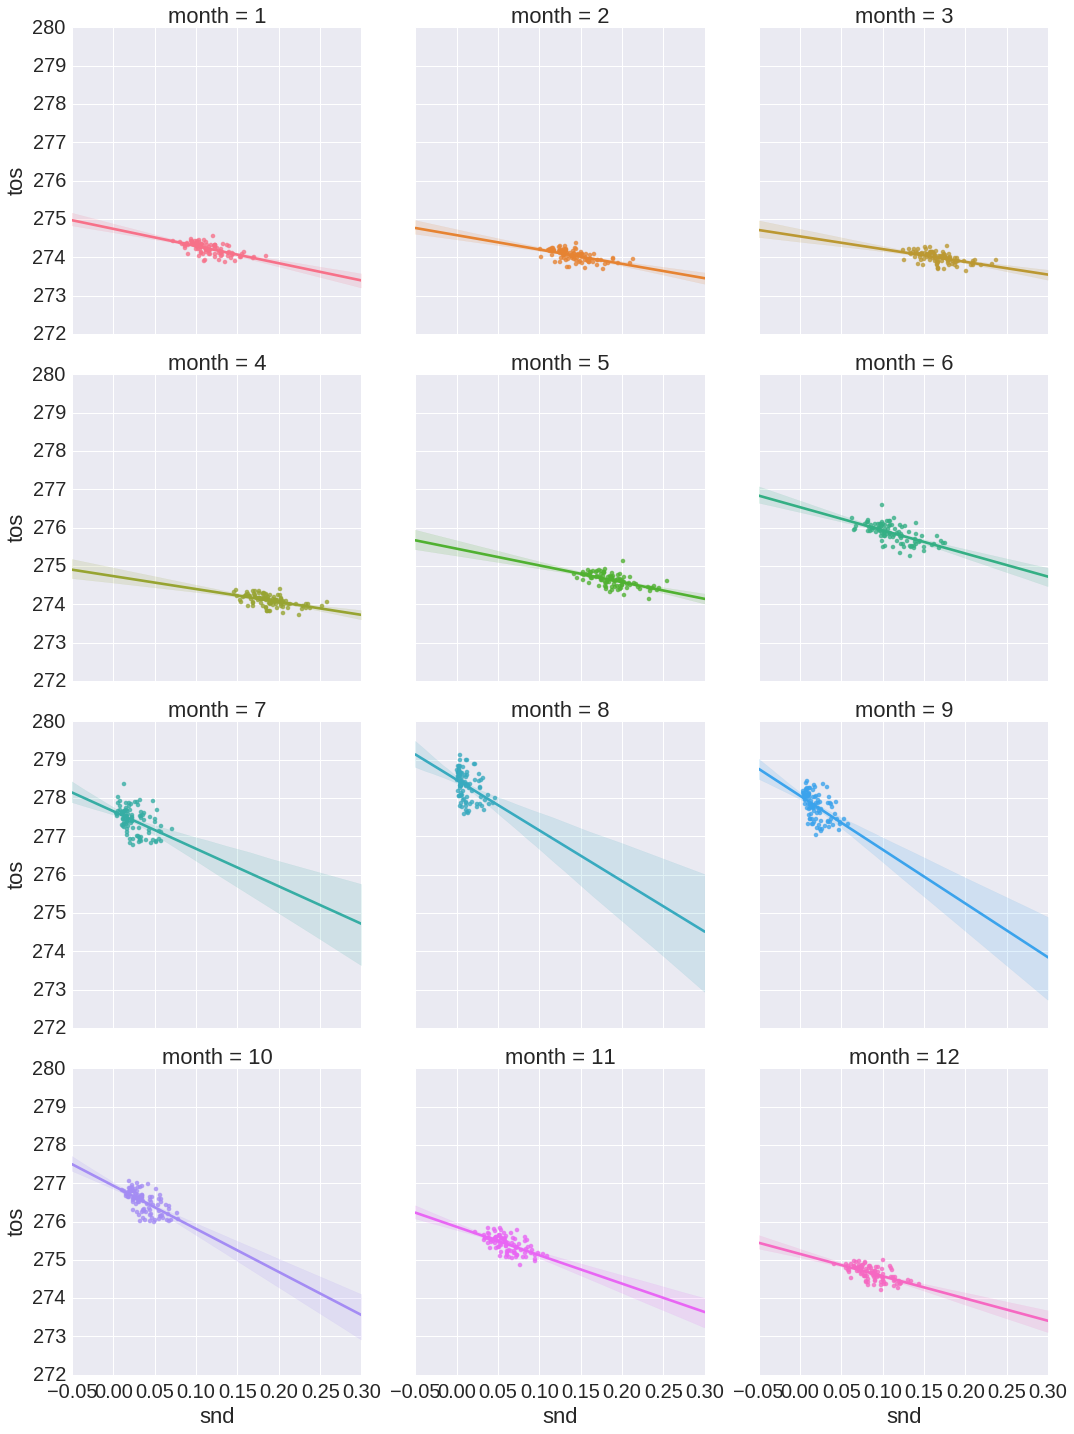

In [15]:
sns.set(font_scale=2)  #larger labels
sns.lmplot(x="snd", y="tos", data=both_means_df, size=5, col="month", hue="month", col_wrap=3)

/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)
/usr/lib/python2.7/dist-packages/matplotlib/collections.py:631: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


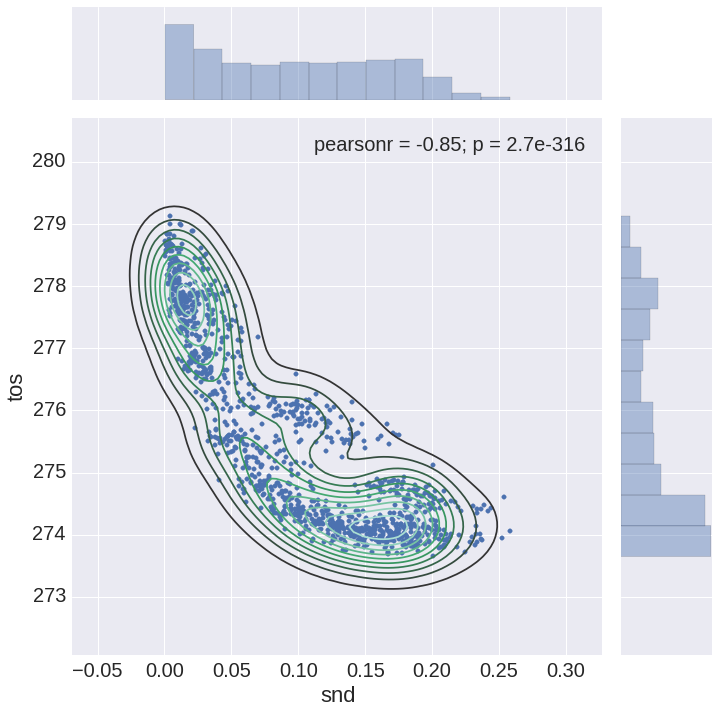

In [16]:
sns.jointplot(x="snd", y="tos", data=both_means_df, size=10).plot_joint(sns.kdeplot)